<a href="https://colab.research.google.com/github/tshreegupta/ECE595DL/blob/main/Project3/gupta_tanushree_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Tanushree Gupta
#ECE 595 Machine Learning II
#Project 3: GAN - Student Code

In [1]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Part 1: Implementing the GAN

In [2]:
#Load MNIST data and normalize to [-1, 1]
# Fill this in
(data_train, _), (data_test, _) = mnist.load_data()
data_train = (2.0*data_train/255.0)- 1.0
data_test = (2.0*data_test/255.0) - 1.0

11501568/11490434 [==============================] - 2s 0us/step


In [12]:
data_train = data_train.reshape(60000,-1)
data_test = data_test.reshape(10000,-1)
print(data_test.shape)

(10000, 784)


In [25]:
# The D-dimensional noise vector length
latent_dim = 100

# Dimension of generaed output
data_dim = 784
# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def dis_adam_optimizer():
    # FILL THIS IN
    return adam(lr = 0.0002, beta_1 = 0.5)

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def gan_adam_optimizer():
    # FILL THIS IN
    return adam(lr = 0.001)

# Genrerator model
def create_generator():
    # FILL THIS IN
    generator = Sequential()
    generator.add(Dense(250 , input_dim=latent_dim))
    generator.add(LeakyReLU(0.1))
    generator.add(Dense(550))
    generator.add(LeakyReLU(0.1))
    generator.add(Dense(1100))
    generator.add(LeakyReLU(0.1))
    generator.add(Dense(data_dim, activation = 'tanh'))

    return generator

# Discriminator model
def create_discriminator(drop, drop_alpha):
    # FILL THIS IN
    discriminator = Sequential()
    discriminator.add(Dense(1100 , input_dim=data_dim))
    discriminator.add(LeakyReLU(0.1))
    if drop:
        discriminator.add(Dropout(drop_alpha))
    discriminator.add(Dense(550))
    discriminator.add(LeakyReLU(0.1))
    if drop:
        discriminator.add(Dropout(drop_alpha))
    discriminator.add(Dense(250))
    discriminator.add(LeakyReLU(0.1))
    discriminator.add(Dense(1, activation = 'sigmoid'))
    discriminator.compile(loss = 'binary_crossentropy',
                optimizer = dis_adam_optimizer(),
                metrics = ['accuracy'])
    return discriminator

# Create adversarial model
def create_gan(discriminator, generator):
    # FILL THIS IN
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(input = gan_input, output = gan_output)
    gan.compile(loss = 'binary_crossentropy',
                optimizer = gan_adam_optimizer(),
                metrics = ['accuracy'])

    return gan

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("se..., inputs=Tensor("in...)`


Epoch 10000
10000: [Discriminaotr loss: 0.590184, acc: 0.438965]  [GAN loss: 1.066877, acc: 0.224609]


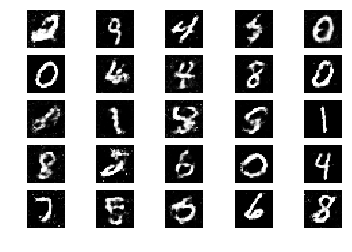

In [ ]:

# Creating GAN
generator = create_generator()
discriminator = create_discriminator(True,0.5)
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 100000
batch_size = 1024
sample_interval = epochs/10

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    # FILL THIS IN
    noise = np.random.normal(0,1,[batch_size,latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake_images = generator.predict(noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real_images = data_train[np.random.randint(0,data_train.shape[0],batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    input_batch = np.concatenate([real_images,fake_images])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size)
    label[:batch_size] = 0.94

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss =discriminator.train_on_batch(input_batch,label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    wlabel_noise = np.random.normal(0,1,[batch_size,latent_dim])
    wlabel = np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(wlabel_noise,wlabel)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

Text(0.5,1,'Training loss')

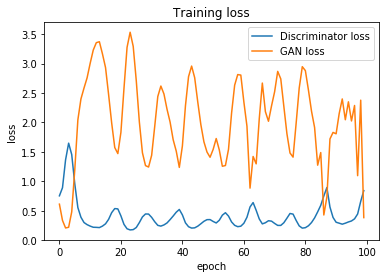

In [27]:
# Plot model loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator loss','GAN loss'])
plt.title('Training loss')

Text(0.5,1,'Training Accuracy')

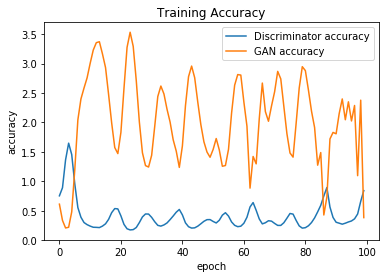

In [28]:
# Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Discriminator accuracy','GAN accuracy'])
plt.title('Training Accuracy')

### Question 4: Importance of Dropout in the discriminator

In [ ]:

# Creating GAN
generator = create_generator()
discriminator = create_discriminator(False,0.5)
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 100000
batch_size = 1024
sample_interval = epochs/10

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    # FILL THIS IN
    noise = np.random.normal(0,1,[batch_size,latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake_images = generator.predict(noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real_images = data_train[np.random.randint(0,data_train.shape[0],batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    input_batch = np.concatenate([real_images,fake_images])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size)
    label[:batch_size] = 0.94

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss =discriminator.train_on_batch(input_batch,label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    wlabel_noise = np.random.normal(0,1,[batch_size,latent_dim])
    wlabel = np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(wlabel_noise,wlabel)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

In [ ]:
# Plot model loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Discriminator loss','GAN loss'])
plt.title('Training loss')

In [ ]:
# Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot(training_meta_data[:,0])
plt.plot(training_meta_data[:,1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Discriminator accuracy','GAN accuracy'])
plt.title('Training Accuracy')

### Question 5a: Dropout rate decreased by 0.1

In [ ]:

# Creating GAN
generator = create_generator()
discriminator = create_discriminator(True,0.4)
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 50000
batch_size = 1024
sample_interval = epochs/10

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    # FILL THIS IN
    noise = np.random.normal(0,1,[batch_size,latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake_images = generator.predict(noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real_images = data_train[np.random.randint(0,data_train.shape[0],batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    input_batch = np.concatenate([real_images,fake_images])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size)
    label[:batch_size] = 0.94

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss =discriminator.train_on_batch(input_batch,label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    wlabel_noise = np.random.normal(0,1,[batch_size,latent_dim])
    wlabel = np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(wlabel_noise,wlabel)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

### Question 5b) Bonus Question


In [ ]:
# The D-dimensional noise vector length
latent_dim = 100

# Dimension of generaed output
data_dim = 784
# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def dis_adam_optimizer():
    # FILL THIS IN
    return adam(lr = 0.0002, beta_1 = 0.5)

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def gan_adam_optimizer():
    # FILL THIS IN
    return adam(lr = 0.001)

# Genrerator model
def create_generator_b():
    # FILL THIS IN
    generator = Sequential()
    generator.add(Dense(300 , input_dim=latent_dim))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(600))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(1200))
    generator.add(LeakyReLU(0.1))
    generator.add(Dense(data_dim, activation = 'tanh'))

    return generator

# Discriminator model
def create_discriminator_b(drop, drop_alpha):
    # FILL THIS IN
    discriminator = Sequential()
    discriminator.add(Dense(1200 , input_dim=data_dim))
    discriminator.add(LeakyReLU(0.1))
    if drop:
        discriminator.add(Dropout(drop_alpha))
    discriminator.add(Dense(600))
    discriminator.add(LeakyReLU(0.1))
    if drop:
        discriminator.add(Dropout(drop_alpha))
    discriminator.add(Dense(300))
    discriminator.add(LeakyReLU(0.1))
    discriminator.add(Dense(1, activation = 'sigmoid'))
    discriminator.compile(loss = 'binary_crossentropy',
                optimizer = dis_adam_optimizer(),
                metrics = ['accuracy'])
    return discriminator

# Create adversarial model
def create_gan(discriminator, generator):
    # FILL THIS IN
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(input = gan_input, output = gan_output)
    gan.compile(loss = 'binary_crossentropy',
                optimizer = gan_adam_optimizer(),
                metrics = ['accuracy'])

    return gan

In [ ]:

# Creating GAN
generator_b = create_generator_b()
discriminator_b = create_discriminator_b(True,0.4)
gan = create_gan(discriminator_b, generator_b)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 50000
batch_size = 1024
sample_interval = epochs/10

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    # FILL THIS IN
    noise = np.random.normal(0,1,[batch_size,latent_dim])

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake_images = generator_b.predict(noise)

    # Get a random set of real MNIST images
    # FILL THIS IN
    real_images = data_train[np.random.randint(0,data_train.shape[0],batch_size)]

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    input_batch = np.concatenate([real_images,fake_images])

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    label = np.zeros(2*batch_size)
    label[:batch_size] = 0.94

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    discriminator_b.trainable = True

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    d_loss =discriminator_b.train_on_batch(input_batch,label)

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    wlabel_noise = np.random.normal(0,1,[batch_size,latent_dim])
    wlabel = np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator_b.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(wlabel_noise,wlabel)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminaotr loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator_b.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

[4]. Compare and comment on the results of GAN with dropout and without dropout.


[5][a]. Comment on importance of hyper-parameter tuning


[6]. Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: 


2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: 

#Part 2: Generating samples using trained generator

In [ ]:
# Generate ten images from Gaussian noise using the trained generator from Part 1
# FILL THIS IN
ran_noise = np.random.normal(0, 1, [10, latent_dim])
gen_images = generator.predict(ran_noise)

# Re-scale generated images to lie in [0, 1]
# FILL THIS IN
gen_images = 0.5 * gen_images + 0.5

In [ ]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

In [ ]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((gen_images[cnt].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

#Part 3: Testing accuracy of generated images on ten samples

In [ ]:
# Load mnist classifier and generated images
mnist_classifier = load_model('mnist_classifier.h5')

In [ ]:
# ASSIGN CLASSES
labels = []

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

# Show classifications
# FILL THIS IN 
mnist_classifier.predict(gen_images)
print("Classification\n")
print(pred_mnist)

print("\n\nPredicted Label")
print(np.argmax(pred_mnist, axis=1))
print("\nTrue Label")
print(labels)

# Convert integer labels to one-hot labels 
labels = keras.utils.np_utils.to_categorical(labels, num_classes=10)

# Evaluate accuracy
# FILL THIS IN
loss, acc = mnist_classifier.evaluate(gen_images, labels, verbose=0)
print("\nLoss: {:e}\n\nAccuracy: {:0.2f}%".format(loss, acc*100))

**a) State the accuracy of the classifier on your ten generated images. Based on this accuracy, would you say your generator does well in producing images comparable to those in the MNIST dataset of hand-written digits? Why or why not?**

**b) In this project, we only tested the performance of the pre-trained classifier on ten samples and used its result to determine the robustness of the generator. How could we better assess the quality of the generated images using this pre-trained classifier and the saved generator?**